<a href="https://colab.research.google.com/github/tusker4/Sesac_Saltlux_DeepLearning/blob/main/6_%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98%EA%B8%B0%EB%B0%98_CNN%ED%95%B5%EC%8B%AC%ED%8C%8C%ED%8A%B8_%EA%B5%AC%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 개요
- 토치를 이용하여, CNN의 합성곱층, 풀링층 구현
- 단, 패딩은 생략

- 토치를 이용하여, CNN의 합성곱층, 풀링층 구현
- 단, 패딩은 생략
-  커널(필터)이 파라미터로 가지는 가중치값에 따른 원본데이터 특징 정보 추출 체크
- 풀링을 통한 특징 강화 체크


# 데이터

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# PilLow
from PIL import Image


In [71]:
img = Image.open('/content/drive/MyDrive/머신러닝(솔트룩스)/딥 러닝/img/torch_cnn_sample(1).png')

In [100]:
# 이미지 데이터 => 수치화 => 텐서로드
img_arr = np.array(img)
img_arr.shape   # (h, w, c) 칼라이미지

(150, 150)

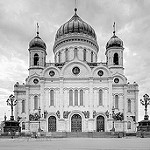

In [101]:
img = img.convert('L')
img

In [102]:
img_arr = np.array(img)
img_arr.shape # (h,w), 그레이 스케일이미지, 0~255 : 0 ~ 256


(150, 150)

In [104]:
img_arr

array([[212, 213, 215, ..., 197, 199, 200],
       [215, 216, 216, ..., 197, 199, 200],
       [214, 215, 216, ..., 196, 197, 198],
       ...,
       [171, 171, 172, ..., 163, 166, 161],
       [174, 174, 174, ..., 173, 175, 168],
       [168, 168, 168, ..., 158, 159, 150]], dtype=uint8)

In [96]:
import torch

# 텐서로 변환
img_tensor = torch.Tensor(img_arr)
img_tensor

tensor([[212., 213., 215.,  ..., 197., 199., 200.],
        [215., 216., 216.,  ..., 197., 199., 200.],
        [214., 215., 216.,  ..., 196., 197., 198.],
        ...,
        [171., 171., 172.,  ..., 163., 166., 161.],
        [174., 174., 174.,  ..., 173., 175., 168.],
        [168., 168., 168.,  ..., 158., 159., 150.]])

In [77]:
img_tensor.size(),img_tensor.size()[0]

(torch.Size([150, 150]), 150)

In [78]:
#모양(형상), 타입, 차원
img_tensor.size(), img_tensor.type(), img_tensor.dim()
# 최대, 최소

(torch.Size([150, 150]), 'torch.FloatTensor', 2)

# 합성곱 직접 구현

- 원본이미지 :img_tensor
- 커널(필터) : k, ver_kernnel, hor_kernel
  - ver_kernel, hor_kernel
    - 수직/수평 성분(특징)을 추출하는 커널
    - 두개 특징을 합치면 => 외곽선 정보를 추출하는 커널
    - 가중치를 임의로 지정해서 확인
  - 커널 크기
    - (3,3)
  - W : 수직, 수평 성분 추출용 임의지정
- 스트라이드
  - 커널이 원본이미지 상을 슬라이딩 하면서 공간정보를 특징을 추출할때, 그 이동량
  -  수직/수평 이동량 : 1
  - 이동 (왼->오, 위->아)
- 패딩, 바이어스
  - 생략

# 커널 준비

In [79]:
# 라이트가 사물에 비칠때 밝고 어두음을 값으로 표현
ver_kernel = torch.Tensor(
    [
        [1, 0, -1],
        [1, 0, -1],
        [1, 0, -1]
    ]
)
ver_kernel

tensor([[ 1.,  0., -1.],
        [ 1.,  0., -1.],
        [ 1.,  0., -1.]])

In [80]:
ver_kernel.T  # 가로 세로 변경

tensor([[ 1.,  1.,  1.],
        [ 0.,  0.,  0.],
        [-1., -1., -1.]])

In [108]:
hor_kernel = ver_kernel.T
hor_kernel

tensor([[ 1.,  1.,  1.],
        [ 0.,  0.,  0.],
        [-1., -1., -1.]])

# 스트라이드

In [81]:
stride =1 # 수평, 수직 이동량 모두 의미

## 합성곱 구현상 필요한 변수 생성

In [82]:
# 커널의 크기 :
ver_kernel.shape
k_h, k_w = ver_kernel.size()
k_h, k_w

(3, 3)

In [83]:
# 원본 이미지의 크기
img_h, img_w = img_tensor.size()
img_h, img_w

(150, 150)

# 합성곱 구현

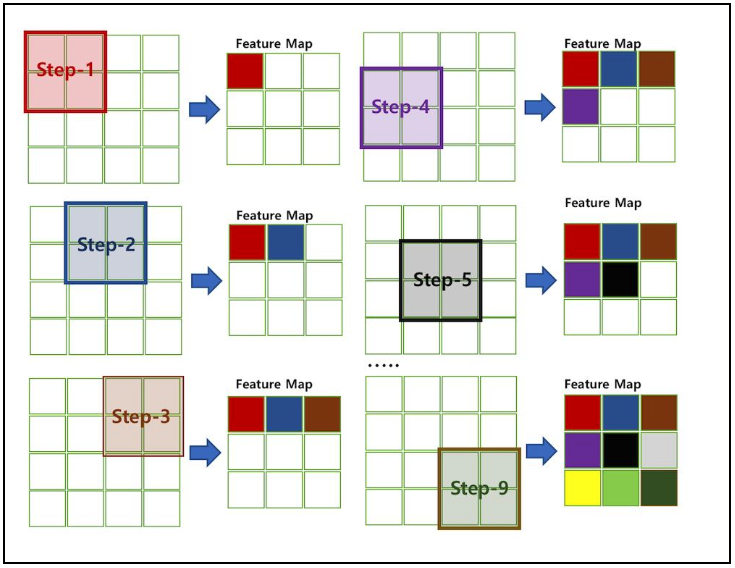

In [84]:
from IPython.display import Image
Image('/content/drive/MyDrive/머신러닝(솔트룩스)/딥 러닝/cnn/cnn_3.png')

In [85]:
# 연습
a = torch.Tensor([
    [1,2,3,],
    [4,5,6,],
    [7,8,9,]
]
)
a, a.size()

(tensor([[1., 2., 3.],
         [4., 5., 6.],
         [7., 8., 9.]]),
 torch.Size([3, 3]))

In [86]:
# 백터 내적 : 1차원 * 1차원
# 행렬곱 (mm)   : 2차원 * 2차원
# 스칼라 곱   : n차원 * 스칼라
# 다차원 내적 : n차원 * 1차원
# 다차원 행렬곱  :  n차원 * m차원     (3,2)(2,3) = (3,3)
# 같은 자리에 있는 혹은 준하여 곱한값을 모두 더했다.

# 동일한 shape 을 가진 행렬을 곱해서, 모든 원소를 더했다. -> feature map 연산내용
a*a, torch.sum(a*a)

(tensor([[ 1.,  4.,  9.],
         [16., 25., 36.],
         [49., 64., 81.]]),
 tensor(285.))

In [87]:
# final_buf = list()  # feature 를 담는 그릇

# # 구현

# '''
# 1. 수직으로 내려가는 부분부터 반복
# 2. 그 내부에서 수평으로 가는 부분 반복
# 2 x 1 = 2
# 2 x 2 = 4
# 9 x 9 = 81
# '''

# # 1. 수직성분반복
# for i in range(0, img_h - k_h +1 , stride) :  # range(0, 150- 3 +1, step =1)
#   buf = list()
#   for j in range(0, img_w - k_w + 1, stride):
#     # 커널이 이동한다 => 이때 겹쳐지는 원본이미지의 데이터 추출  (3 x 3)
#     # 원본이미지와 커널이 겹쳐지는 구간의 원본데이터를 추출하시오.

#     # i : i + k_h == i <= 수직성분 < i + k_h
#     img_target = img_tensor[ i: i+k_h , j : j+k_w] # 추출된 데이터는 2d 이므로 슬라이싱 처리
#     # sum(커널 * 원본) => 1개의 값
#     buf.append(torch.sum(img_target * ver_kernel))
#   final_buf.append(buf)


In [122]:
feature_map = torch.Tensor(final_buf)
feature_map.size()

torch.Size([1036, 148])

In [89]:
feature_map  # 이미지에 음수가 많다. -> 색 자체가 탁하다

tensor([[ -6.,  -3.,   3.,  ...,  -8., -10.,  -8.],
        [ -6.,  -4.,  -1.,  ...,  -7.,  -7.,  -4.],
        [ -9., -10.,  -8.,  ...,  -3.,  -1.,   1.],
        ...,
        [  0.,   1.,   2.,  ...,   2.,  -1.,   5.],
        [ -1.,  -1.,   0.,  ...,   4.,   2.,   8.],
        [ -1.,  -2.,   0.,  ...,   4.,   6.,  15.]])

In [90]:
img_arr

array([[212, 213, 215, ..., 197, 199, 200],
       [215, 216, 216, ..., 197, 199, 200],
       [214, 215, 216, ..., 196, 197, 198],
       ...,
       [171, 171, 172, ..., 163, 166, 161],
       [174, 174, 174, ..., 173, 175, 168],
       [168, 168, 168, ..., 158, 159, 150]], dtype=uint8)

In [91]:
ver_kernel

tensor([[ 1.,  0., -1.],
        [ 1.,  0., -1.],
        [ 1.,  0., -1.]])

In [92]:
img_tensor

tensor([[212., 213., 215.,  ..., 197., 199., 200.],
        [215., 216., 216.,  ..., 197., 199., 200.],
        [214., 215., 216.,  ..., 196., 197., 198.],
        ...,
        [171., 171., 172.,  ..., 163., 166., 161.],
        [174., 174., 174.,  ..., 173., 175., 168.],
        [168., 168., 168.,  ..., 158., 159., 150.]])

In [110]:
# 합성곱 처리내용을 함수화, 패딩배제
def my_convolution(x, kernel, stride=(1,1)):
  '''
      x = 원본데이터(이미지)
      kernel : 커널(가중치를 파라미터로 가진, w를 값으로 가지고 있다, 커널크기)
      stride : 커널의 이동량

    final_buf = list()  # feature 를 담는 그릇
  '''
  # 지역변수 처리
  img_h, img_w =  x.size()
  k_h, k_w     =  kernel.size()
  s_h, s_w     =  stride

  final_buf = list()
  for i in range(0, img_h - k_h +1 , s_h) :  # range(0, 150- 3 +1, step =1)
    buf = list()
    for j in range(0, img_w - k_w + 1, s_w):
      img_target = img_tensor[ i: i+k_h , j : j+k_w]
      buf.append(torch.sum(img_target * kernel))
    final_buf.append(buf)

  return torch.Tensor(final_buf)

ver_feature_map = my_convolution( img_tensor, ver_kernel, (1,1))
ver_feature_map.size(), ver_feature_map



(torch.Size([148, 148]),
 tensor([[ -6.,  -3.,   3.,  ...,  -8., -10.,  -8.],
         [ -6.,  -4.,  -1.,  ...,  -7.,  -7.,  -4.],
         [ -9., -10.,  -8.,  ...,  -3.,  -1.,   1.],
         ...,
         [  0.,   1.,   2.,  ...,   2.,  -1.,   5.],
         [ -1.,  -1.,   0.,  ...,   4.,   2.,   8.],
         [ -1.,  -2.,   0.,  ...,   4.,   6.,  15.]]))

In [111]:
hor_feature_map = my_convolution( img_tensor, hor_kernel, (1,1))
hor_feature_map.size(), hor_feature_map


(torch.Size([148, 148]),
 tensor([[ -5.,  -4.,  -3.,  ...,   5.,   5.,   5.],
         [ 16.,  13.,   7.,  ...,   3.,   8.,  13.],
         [ 28.,  23.,  14.,  ...,   2.,   8.,  15.],
         ...,
         [-27., -30., -32.,  ...,  19.,  21.,  22.],
         [-42., -44., -46.,  ...,  -2.,   1.,   6.],
         [ 10.,  11.,  13.,  ...,  15.,  17.,  23.]]))

## 합성곱을 통과한 피처맵의 시각화

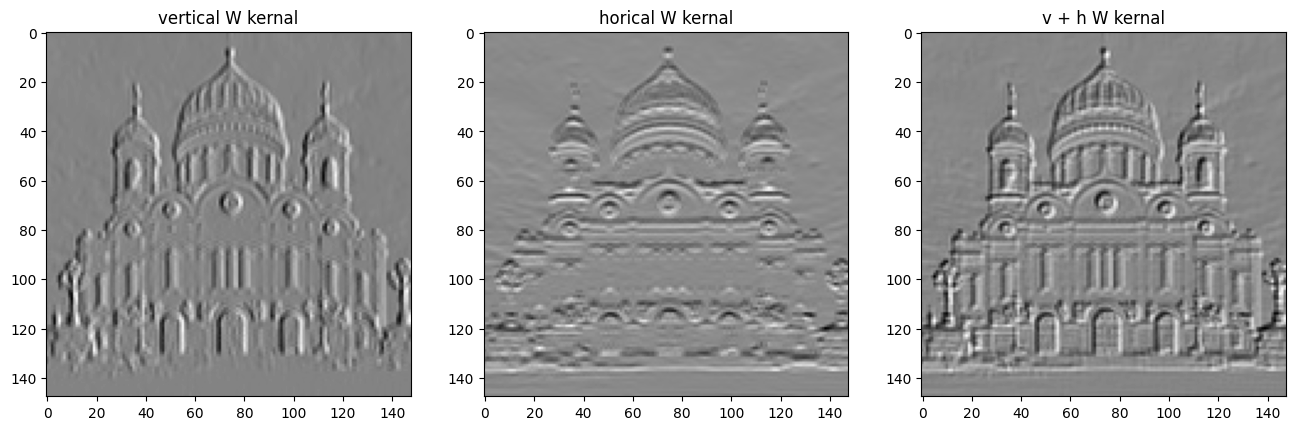

In [114]:
# 수직, 수평, 수직+수평
fig, (ax1, ax2, ax3)= plt.subplots( 1, 3, figsize=(16, 5))

ax1.set_title('vertical W kernal')
ax1.imshow(ver_feature_map, cmap = 'binary')

ax2.set_title('horical W kernal')
ax2.imshow(hor_feature_map, cmap = 'binary')

ax3.set_title('v + h W kernal')
ax3.imshow( ver_feature_map + hor_feature_map, cmap='binary' )

plt.show()

In [93]:
## feature map에 활성화 함수를 적용 = actgivation map


## feature map에 활성화 함수를 적용 = actgivation map
- relu
  - max(0, x) : 음수=>0, 양수 =>자기자신
  

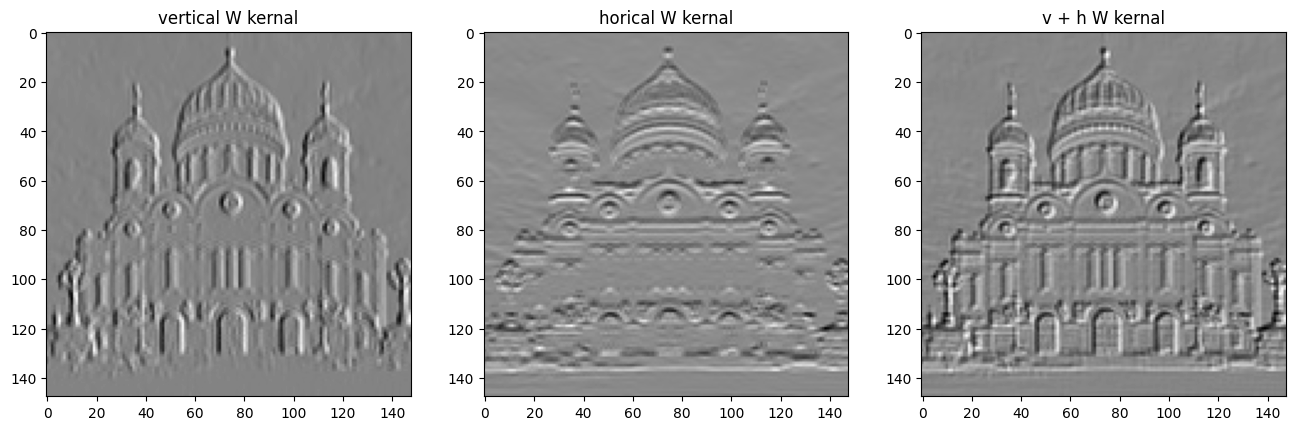

In [118]:
# 수직, 수평, 수직+수평
fig, (ax1, ax2, ax3)= plt.subplots( 1, 3, figsize=(16, 5))

ax1.set_title('vertical W kernal')
ax1.imshow(ver_feature_map, cmap = 'binary')

ax2.set_title('horical W kernal')
ax2.imshow(hor_feature_map, cmap = 'binary')

ax3.set_title('v + h W kernal')
ax3.imshow( ver_feature_map + hor_feature_map, cmap='binary' )

plt.show()

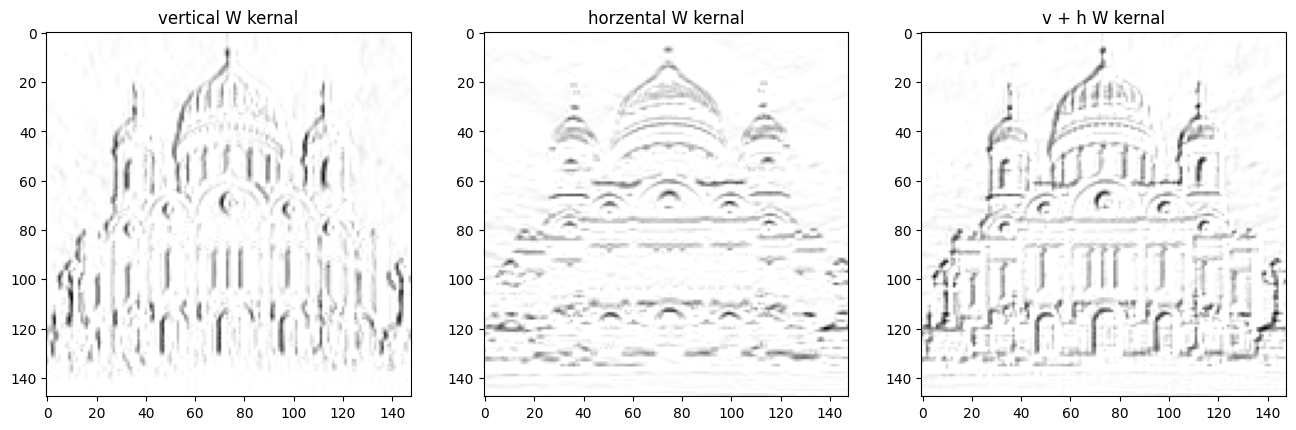

In [121]:
# 어두운 부분을 .relu로 제거
fig, (ax1, ax2, ax3)= plt.subplots( 1, 3, figsize=(16, 5))

ax1.set_title('vertical W kernal')
ax1.imshow( torch.relu(ver_feature_map), cmap='binary' )

ax2.set_title('horzental W kernal')
ax2.imshow( torch.relu(hor_feature_map), cmap='binary' )

ax3.set_title('v + h W kernal')
ax3.imshow( torch.relu(ver_feature_map + hor_feature_map), cmap='binary' )

plt.show()

# 음수로 된 노이즈 제거-> 활성화 함수를 통해서
# 이미지는 좀 흐리다 > 진하게 조정할 필요가 있다 -> 윤곽이 잘보임 -> 특징 강화
# 풀림으로 이동

## API로 구현


In [125]:
import torch.nn as nn

conv_layer = nn.Conv2d(
    in_channels =  1,
    out_channels = 1,
    kernel_size = 3,
    stride = 1,
    bias = False)
conv_layer

Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), bias=False)

In [127]:
# 가중치
conv_layer.weight.data, conv_layer.weight.data.size()

(tensor([[[[ 0.0210,  0.0058,  0.0052],
           [-0.2598,  0.2531, -0.1142],
           [-0.2791,  0.1729, -0.1480]]]]),
 torch.Size([1, 1, 3, 3]))

In [93]:
# 동일하게 구현 -> 수직커널 (3,3) => (1,1,3,3) 으로 변환처리
# reshape, view, unsqueeze, expand(shape 확장될때 사용가능)
ver_kernel.expand(1, 1, ver_kernel.size(0), ver_kernel.size(1))

In [132]:
# 가중치 교체
conv_layer.weight.data = ver_kernel.expand(1, 1, ver_kernel.size(0), ver_kernel.size(1))
conv_layer.weight.data

tensor([[[[ 1.,  0., -1.],
          [ 1.,  0., -1.],
          [ 1.,  0., -1.]]]])

In [133]:
# 원본이미지 2D -> 4D
cur_img = img_tensor.expand(1, 1, img_tensor.size(0), img_tensor.size(1))
cur_img.size()
# channels_first (NCHW)

torch.Size([1, 1, 150, 150])

In [136]:
# cur_img 를 api로 만든 conv_layer에 통과시켜본다.
convs_feature_map = conv_layer(cur_img)
convs_feature_map.size()

torch.Size([1, 1, 148, 148])

In [137]:
# 4D -> 2D : 직접 만든 결과 와 비교, 시각화 등등
convs_feature_map.squeeze().size()

torch.Size([148, 148])

In [138]:
# 비교
torch.sum(convs_feature_map.squeeze() == ver_feature_map )

# tensor(21904) = 148* 148
# api로 만들든 내가 만든게 같은 값이다.


tensor(21904)

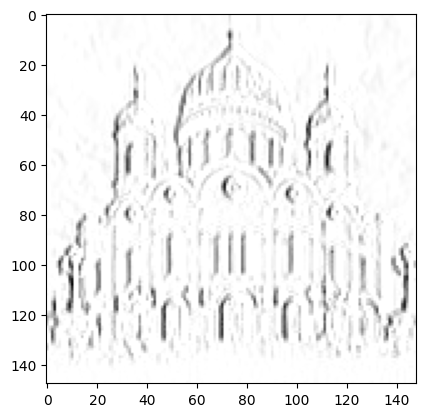

In [140]:
# api 로 통과한 텐서는 최적화를 위해서 락이 걸려 있다.
# 오차약전파 처리를 위한 미분 처리 락이 걸려있다.
# 3. 중간에 확인 => 락 해제 => detach()
# 훈련중 중간에 테스트 => 락헤제 => 텍스트 결과가 영향을 미치지 않게 조정
plt.imshow(torch.relu(convs_feature_map.squeeze() ).detach().numpy(), cmap='binary' )
plt.show()

# 합성곱 요인들의 관계식
- 관계식을 통해 shape 계산 가능
- 재료
  - k(커널), s(이동량), p(패딩), h(입력이미지높이), w(입력이미지 너비)
- 관계식
  - 원본이미지 -> 합성곱 통과 -> 이미지의 크기(h' ,w' )
  - h' = (h+ 2*p - k / s) + 1
      = ((150+2*0-3)/ 1 ) + 1
      = 148
  - w' = ( ( w + 2*p - k) / s ) +1

# 최대풀링 직접 구현
- 풀링 : 특징 강화
  - 최대풀링 : 원본이미지와 커널이 겹치는 구간에서 최대값을 대표값으로 취한다.
    - max()
  - 가중치 X, 편향 X,
  - 학습 X

In [142]:
from torch.nn.modules import activation

# 활성화 맵에서 시작
activation_map = torch.relu(ver_feature_map)
activation_map

tensor([[ 0.,  0.,  3.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  0.,  0.,  1.],
        ...,
        [ 0.,  1.,  2.,  ...,  2.,  0.,  5.],
        [ 0.,  0.,  0.,  ...,  4.,  2.,  8.],
        [ 0.,  0.,  0.,  ...,  4.,  6., 15.]])

In [ ]:
# 커널 사이즈, 정방형
kernel_size = 2
# 이동량
stride_size = 2
# (148, 148)

- torch 에서 제공하는 fold(), unfold()를 활용

In [143]:
tmp = torch.arange(0, 16).view(1,1,4,4)  # 유사 reshape
tmp.size(),tmp

(torch.Size([1, 1, 4, 4]),
 tensor([[[[ 0,  1,  2,  3],
           [ 4,  5,  6,  7],
           [ 8,  9, 10, 11],
           [12, 13, 14, 15]]]]))

In [149]:

'''
    dimension : _int, 어떤 차원을 대상으로 펼칠 것인가
    size : _int,      펼쳤을 때 몇개씩 묶을 것인가
    step : _int       단계, 얼마 간격으로 건너치면서 처리
'''
# -1 : 첫번째값만 인덱싱 최대값 처리
tmp.unfold(2, 2, 2).unfold(3, 2, 2).max(-1)[0]

tensor([[[[[ 1,  5],
           [ 3,  7]],

          [[ 9, 13],
           [11, 15]]]]])

In [150]:
tmp.unfold(2, 2, 2).unfold(3, 2, 2).max(-1)[0].max(-1)[0]

tensor([[[[ 5,  7],
          [13, 15]]]])

In [151]:
activation_map_4d = activation_map.expand( 1, 1, activation_map.size(0),
                                          activation_map.size(1) )
activation_map_4d.size()

torch.Size([1, 1, 148, 148])

In [152]:
# 직접 함수 구현
def my_max_pooling( x, kernal_size, stride=None):
    '''
        stride : 커널이 이동하는양, unfold 연산을 하기위해 이동하는양:step
        kernal_size : 원본 이미지와 겹치는 양(최대값을 구하는 범위)
                      unfold 연산후 묶이는 양 : size
    '''
    if not stride:
        stride = kernal_size
    return x.unfold(2, kernal_size, stride).unfold(3, kernal_size, stride).max(-1)[0].max(-1)[0]
    pass

max_pool_map = my_max_pooling( activation_map_4d, 2)
max_pool_map.size()

torch.Size([1, 1, 74, 74])